In [1]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test-5m.csv')
df

,datetime,stationCode,meca,elec,park
0,2021-10-15 06-11,16107,2,4,28
1,2021-10-15 06-11,11104,8,2,9
2,2021-10-15 06-11,9020,1,1,19
3,2021-10-15 06-11,12109,24,3,1
4,2021-10-15 06-11,5001,0,0,43
...,...,...,...,...,...
75891,2021-10-15 10-30,34012,0,0,26
75892,2021-10-15 10-30,26009,0,0,0
75893,2021-10-15 10-30,17126,16,8,6
75894,2021-10-15 10-30,32012,10,13,13


In [3]:
URL_VELIB_STATIONS = "https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json"
def get_stations_df():
    response = requests.get(URL_VELIB_STATIONS)
    stations_df = (pd.DataFrame(response.json()["data"]["stations"])
                   .set_index("station_id"))
    return stations_df
stations_df = get_stations_df()
stations_df

,name,lat,lon,capacity,stationCode,rental_methods
station_id,,,,,,
213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
516709288,Charonne - Robert et Sonia Delauney,48.855908,2.392571,20,11104,NaN
36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN
100769544,Harpe - Saint-Germain,48.851519,2.343670,46,5001,[CREDITCARD]
...,...,...,...,...,...,...
11437706131,Bateliers - Quai de Seine,48.915818,2.323953,26,34012,NaN
11437961617,Marcel Delorme - Pierre Brossolette,48.912061,2.295897,0,26009,NaN
11438049493,Hélène et François Missoffe - Emile Borel,48.899907,2.321544,32,17126,NaN


In [5]:
df["datetime"] = (pd.to_datetime(df["datetime"], format = '%Y-%m-%d %H-%M')
                  .dt.strftime("%H:%M"))

In [6]:
df.head()

,datetime,stationCode,meca,elec,park
0,06:11,16107,2,4,28
1,06:11,11104,8,2,9
2,06:11,9020,1,1,19
3,06:11,12109,24,3,1
4,06:11,5001,0,0,43


In [7]:
df_home = df[df.stationCode.isin([12008, 12009, 12106, 12011,])]

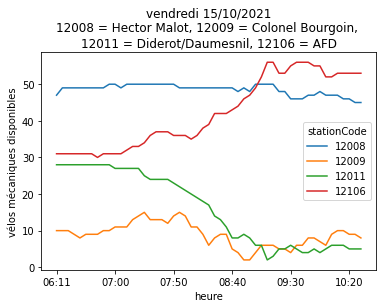

In [8]:
df_home.pivot_table(values="meca", index="datetime", columns="stationCode").plot(xlabel = "heure", ylabel = 'vélos mécaniques disponibles', title = """vendredi 15/10/2021
12008 = Hector Malot, 12009 = Colonel Bourgoin, 
12011 = Diderot/Daumesnil, 12106 = AFD""");
plt.savefig("Velib01.png")